In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [228]:
movie_df = pd.read_csv('tmdb_5000_movies.csv')
credit_df = pd.read_csv('tmdb_5000_credits.csv')

In [229]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [230]:
credit_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [231]:
movie_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [232]:
credit_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [233]:
credit_df.shape

(4803, 4)

In [234]:
movie_df.shape

(4803, 20)

### Combining the two dataframe in the one on the common columns that is `id`

In [235]:
df = credit_df.rename(columns={'movie_id':'id'},index=str)

In [236]:
data = df.merge(movie_df,on='id')

In [237]:
pd.pandas.set_option('max_columns',None)

In [238]:
data.head()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Removing the uncessary columns

In [239]:
data.columns

Index(['id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

In [240]:
data = data[['id','revenue','original_title','vote_average','vote_count','budget','genres','popularity']]

In [241]:
data.head()

,id,revenue,original_title,vote_average,vote_count,budget,genres,popularity
0,19995,2787965087,Avatar,7.2,11800,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577
1,285,961000000,Pirates of the Caribbean: At World's End,6.9,4500,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615
2,206647,880674609,Spectre,6.3,4466,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788
3,49026,1084939099,The Dark Knight Rises,7.6,9106,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950
4,49529,284139100,John Carter,6.1,2124,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4803 non-null   int64  
 1   revenue         4803 non-null   int64  
 2   original_title  4803 non-null   object 
 3   vote_average    4803 non-null   float64
 4   vote_count      4803 non-null   int64  
 5   budget          4803 non-null   int64  
 6   genres          4803 non-null   object 
 7   popularity      4803 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 337.7+ KB


In [243]:
round(data.describe(include='all'),1)

,id,revenue,original_title,vote_average,vote_count,budget,genres,popularity
count,4803.0,4.803000e+03,4803,4803.0,4803.0,4803.0,4803,4803.0
unique,NaN,NaN,4801,NaN,NaN,NaN,1175,NaN
top,NaN,NaN,Batman,NaN,NaN,NaN,"[{""id"": 18, ""name"": ""Drama""}]",NaN
freq,NaN,NaN,2,NaN,NaN,NaN,370,NaN
mean,57165.5,8.226064e+07,NaN,6.1,690.2,29045039.9,NaN,21.5
std,88694.6,1.628571e+08,NaN,1.2,1234.6,40722391.3,NaN,31.8
min,5.0,0.000000e+00,NaN,0.0,0.0,0.0,NaN,0.0
25%,9014.5,0.000000e+00,NaN,5.6,54.0,790000.0,NaN,4.7
50%,14629.0,1.917000e+07,NaN,6.2,235.0,15000000.0,NaN,12.9
75%,58610.5,9.291719e+07,NaN,6.8,737.0,40000000.0,NaN,28.3


### Using Weighted average for each movie's  Average Rating

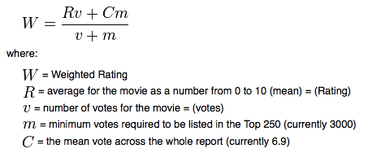

In [244]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/weighted.png')

**- In the above we have the `R` is the `movie rating ` that is given by the user in this case.**

**- `v` is the `number of votes` given for that particular movie.**

**- `C` is the `mean of the rating` that given `by the user.`**

**- `m` standas for the `top listed votes Counts` that are given by the user,we can chooes many as per our convenient.**

In [245]:
vote_data=data[['vote_average','vote_count']].copy()

In [246]:
vote_data.head()

,vote_average,vote_count
0,7.2,11800
1,6.9,4500
2,6.3,4466
3,7.6,9106
4,6.1,2124


In [247]:
R = vote_data['vote_average']
v = vote_data['vote_count']
C  = vote_data['vote_average'].mean()
m = vote_data['vote_count'].quantile(0.70)

In [248]:
data['Weighted Average'] = ((R*v)+ (C*m))/(v+m)

In [249]:
data.head()

,id,revenue,original_title,vote_average,vote_count,budget,genres,popularity,Weighted Average
0,19995,2787965087,Avatar,7.2,11800,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,7.148013
1,285,961000000,Pirates of the Caribbean: At World's End,6.9,4500,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,6.807627
2,206647,880674609,Spectre,6.3,4466,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,6.276075
3,49026,1084939099,The Dark Knight Rises,7.6,9106,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,7.509565
4,49529,284139100,John Carter,6.1,2124,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,6.098319


In [250]:
data_sorted = data.sort_values('Weighted Average',ascending=False)

In [251]:
data_recommended_weighted_avg=data_sorted[['id','original_title','revenue','vote_average','vote_count','budget','popularity','Weighted Average']]

In [252]:
data_recommended_weighted_avg.head(20)

,id,original_title,revenue,vote_average,vote_count,budget,popularity,Weighted Average
1881,278,The Shawshank Redemption,28341469,8.5,8205,25000000,136.747729,8.340775
3337,238,The Godfather,245066411,8.4,5893,6000000,143.659698,8.192887
662,550,Fight Club,100853753,8.3,9413,63000000,146.757391,8.171648
3232,680,Pulp Fiction,213928762,8.3,8428,8000000,121.463076,8.157615
65,155,The Dark Knight,1004558444,8.2,12002,185000000,187.322927,8.102674
809,13,Forrest Gump,677945399,8.2,7927,55000000,138.133331,8.056059
1818,424,Schindler's List,321365567,8.3,4329,22000000,104.469351,8.038748
3865,244786,Whiplash,13092000,8.3,4254,3300000,192.528841,8.034695
96,27205,Inception,825532764,8.1,13752,160000000,167.583710,8.018611
1990,1891,The Empire Strikes Back,538400000,8.2,5879,18000000,78.517830,8.010426


**In this way we can see the movies are recommended as per the weighted average of votes given by the user.
This filtering can be called Colabortive filtering or Content Based Filtering.**

### Visualization To get the better Understanding.

### Top Movie Recommendation On the basis of Weighted Average.

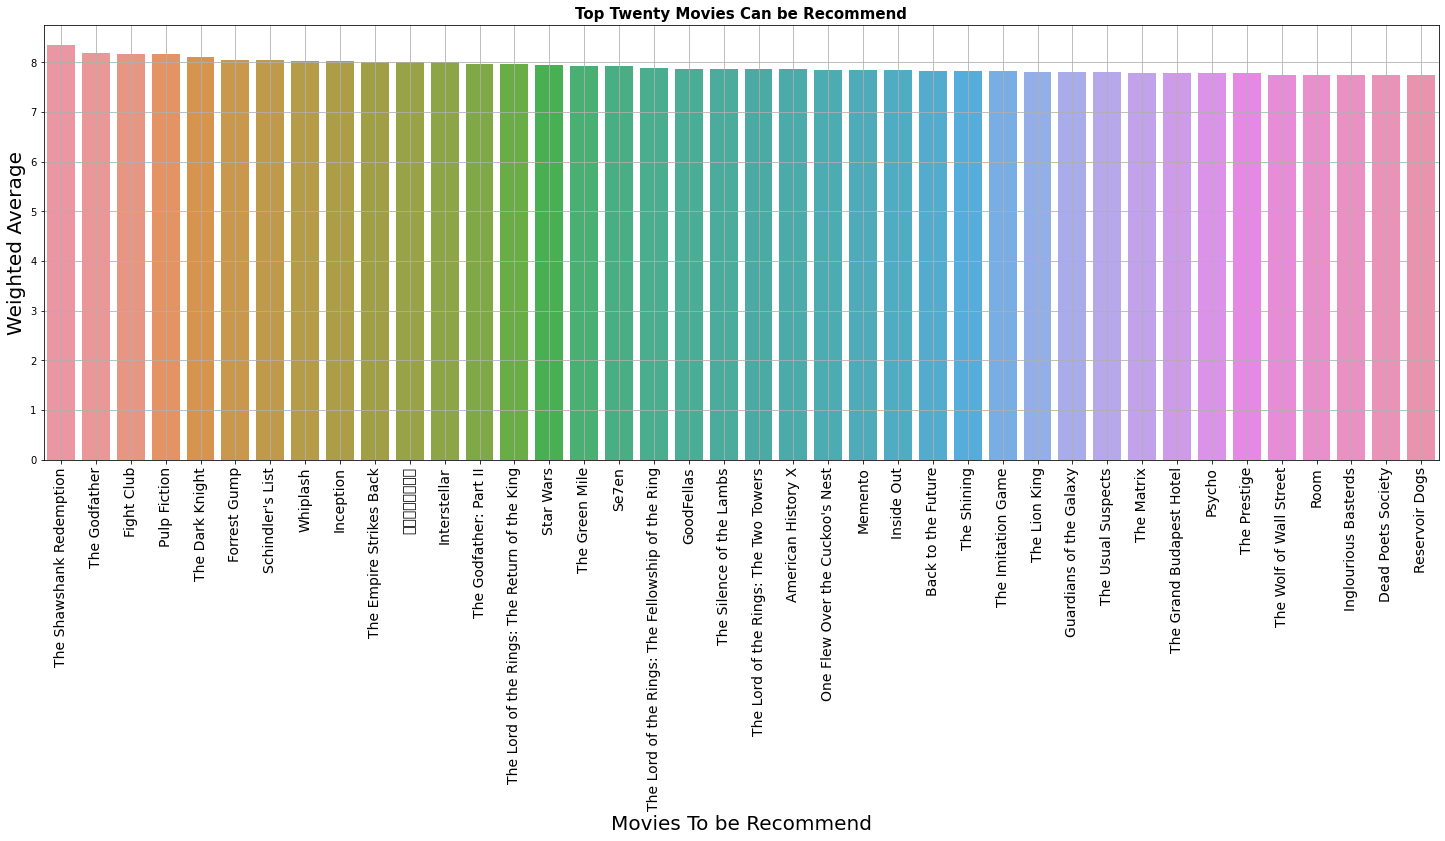

In [277]:
Movies_recommedative=data_recommended_weighted_avg[['original_title','Weighted Average']]
Top_40_Recommendative_Movie=Movies_recommedative.sort_values('Weighted Average',ascending=False).head(40)
Top_40_Recommendative_Movie=Top_40_Recommendative_Movie.set_index(Top_20_Recommendative_Movie['original_title'])
Top_40_Recommendative_Movie.drop(columns=['original_title'])
plt.figure(figsize=(25,8))
sns.barplot(x='original_title',y='Weighted Average',data=Top_40_Recommendative_Movie)
plt.xticks(rotation=90)
plt.xlabel('Movies To be Recommend',fontsize=20)
plt.ylabel('Weighted Average',fontsize=20)
plt.xticks(fontsize=14)
plt.grid()
plt.title('Top Twenty Movies Can be Recommend',fontdict={'fontsize': 15,'fontweight' : 'bold'})
plt.savefig('Top Twenty Movie should Recommend.png')
plt.show()

In [265]:
import plotly
pd.options.plotting.backend = 'plotly'

In [306]:
Top_20_Recommendative_Movie.sort_values('Weighted Average',ascending=False).head(20).plot(kind='bar',x='original_title',y='Weighted Average')

### Most Popular Movie .

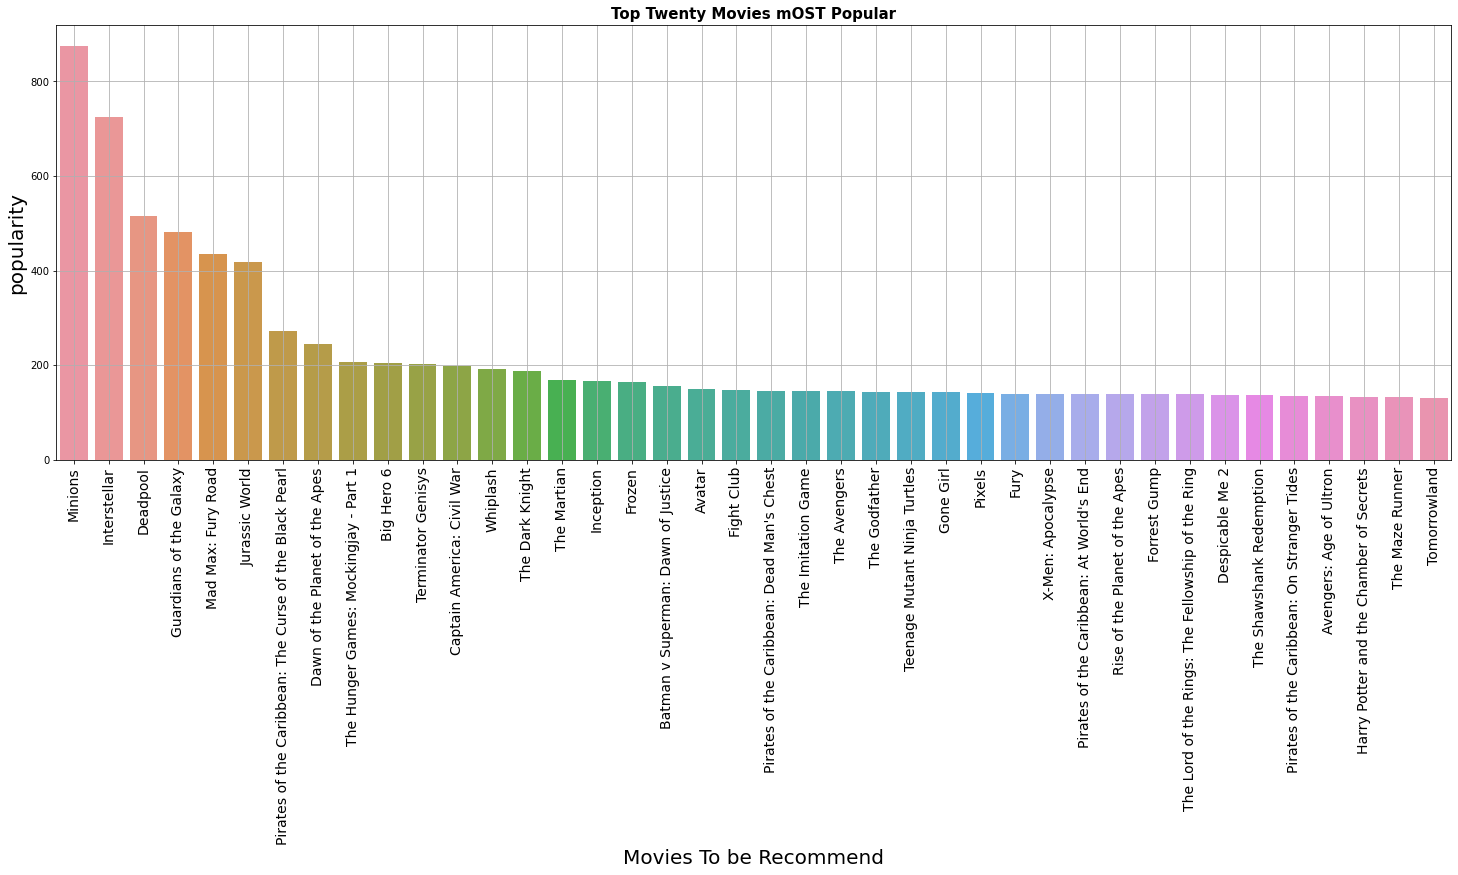

In [280]:
Most_popular_movie=data_recommended_weighted_avg[['original_title','popularity']]
Top_40_Popular_Movie=Most_popular_movie.sort_values('popularity',ascending=False).head(40)
Top_40_Popular_Movie=Top_40_Popular_Movie.set_index(Top_40_Popular_Movie['original_title'])
Top_40_Popular_Movie.drop(columns=['original_title'])
plt.figure(figsize=(25,8))
sns.barplot(x='original_title',y='popularity',data=Top_40_Popular_Movie)
plt.xticks(rotation=90)
plt.xlabel('Movies To be Recommend',fontsize=20)
plt.ylabel('popularity',fontsize=20)
plt.xticks(fontsize=14)
plt.grid()
plt.title('Top Twenty Movies mOST Popular',fontdict={'fontsize': 15,'fontweight' : 'bold'})
plt.savefig('Top Twenty Movie Most Popular.png')
plt.show()

In [299]:
Most_popular_movie.sort_values('popularity',ascending=False).head(20).plot(kind='bar',x='original_title',y='popularity')

- From the if we see the according to the Weighted Average we have got the top movie name that is `The Shawshank Redemption` and From the `Popularity` we have got the top movie name i.e.`Minions`.

- These are two diffrent circumtances through which we can get the movies recommendations.

- So we will give the `weight of 50%` `to each of the score i.e.Weighted average and Popularity scores.`

### Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

If we see the `popularity` and `Weighted Average` are in the different scale.So order to get the common scale we have use make preprocessing on the data by doing standardizing and Normalizing.

In [307]:
from sklearn.preprocessing import MinMaxScaler

In [310]:
scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(data_recommended_weighted_avg[['Weighted Average','popularity']])
data_scalled=pd.DataFrame(movie_scaled_df,columns=['Weighted Average','popularity'])
data_scalled.head()

,Weighted Average,popularity
0,1.000000,0.156179
1,0.959622,0.164074
2,0.953823,0.167611
3,0.949991,0.138723
4,0.934991,0.213941


In [311]:
data_recommended_weighted_avg[['Weighted Average','popularity']]=data_scalled

In [313]:
data_recommended_weighted_avg.head()

,id,original_title,revenue,vote_average,vote_count,budget,popularity,Weighted Average
1881,278,The Shawshank Redemption,28341469,8.5,8205,25000000,0.020092,0.404155
3337,238,The Godfather,245066411,8.4,5893,6000000,0.003182,0.377825
662,550,Fight Club,100853753,8.3,9413,63000000,0.030701,0.519508
3232,680,Pulp Fiction,213928762,8.3,8428,8000000,0.005801,0.379687
65,155,The Dark Knight,1004558444,8.2,12002,185000000,0.067903,0.796938


Now we will give the 50% important to the weighted average and 50 % important to the popularity

In [321]:
dff_weighted = data_recommended_weighted_avg['popularity']*0.5 + data_recommended_weighted_avg['Weighted Average']*0.5

In [322]:
data_recommended_weighted_avg['Score'] = dff_weighted

In [325]:
data_recommended_weighted_avg.sort_values('Score',ascending=False,inplace=True)

In [327]:
data_recommended_weighted_avg.head(10)

,id,original_title,revenue,vote_average,vote_count,budget,popularity,Weighted Average,Score
11,10764,Quantum of Solace,586090727,6.1,2965,200000000,0.827162,0.906439,0.866801
1071,232672,Blended,123494610,6.6,1006,40000000,1.000000,0.460630,0.730315
29,37724,Skyfall,1108561013,6.9,7604,200000000,0.549462,0.851874,0.700668
135,7978,The Wolfman,0,5.5,549,150000000,0.587690,0.725217,0.656453
210,415,Batman & Robin,238207122,4.2,1418,125000000,0.495989,0.670973,0.583481
0,19995,Avatar,2787965087,7.2,11800,237000000,0.156179,1.000000,0.578090
4,49529,John Carter,284139100,6.1,2124,260000000,0.213941,0.934991,0.574466
7,99861,Avengers: Age of Ultron,1405403694,7.3,6767,280000000,0.219887,0.916431,0.568159
1,285,Pirates of the Caribbean: At World's End,961000000,6.9,4500,300000000,0.164074,0.959622,0.561848
2,206647,Spectre,880674609,6.3,4466,245000000,0.167611,0.953823,0.560717


### Top Most Best Rated and Popular Movie

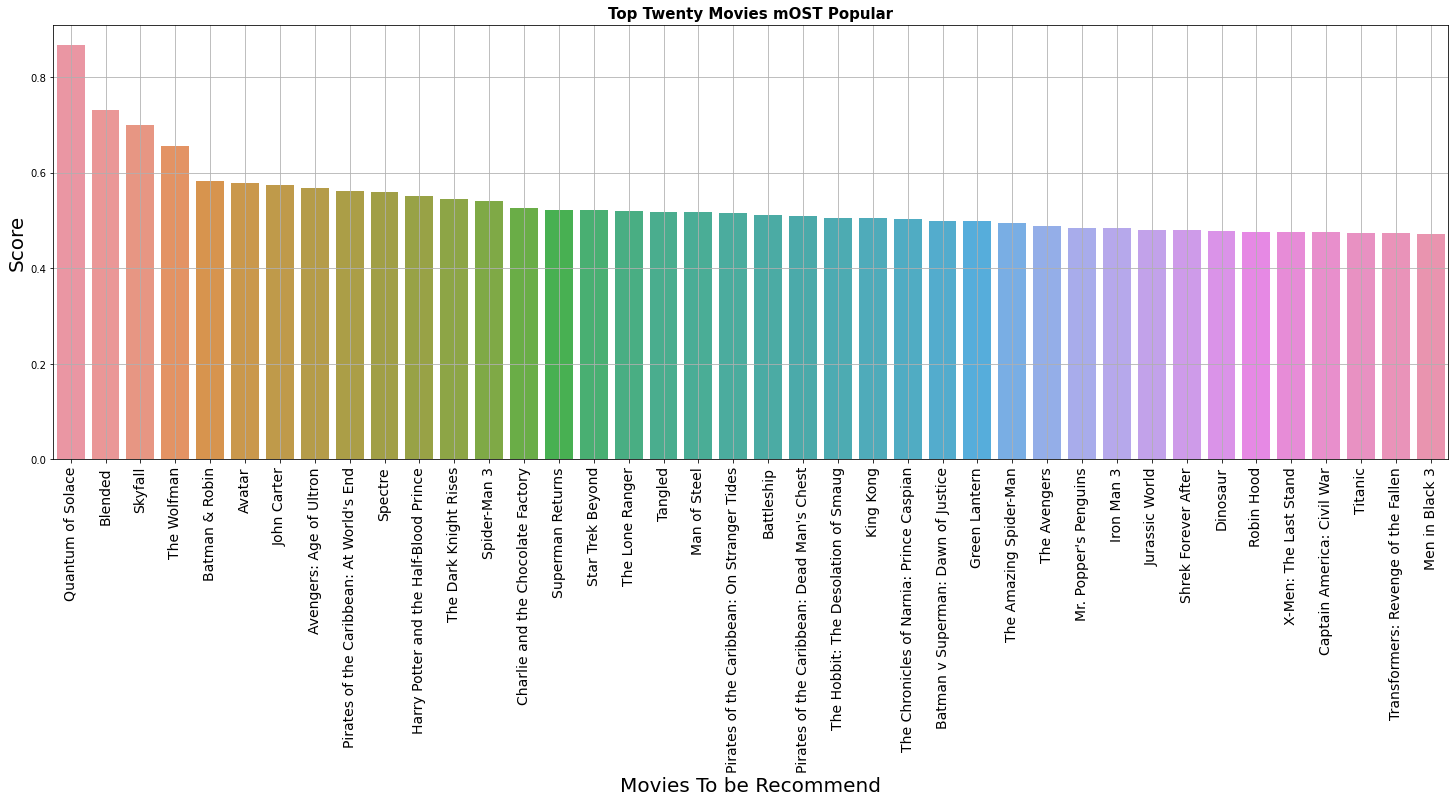

In [328]:
Most_popular_movie=data_recommended_weighted_avg[['original_title','Score']]
Top_40_Popular_Movie=Most_popular_movie.sort_values('Score',ascending=False).head(40)
Top_40_Popular_Movie=Top_40_Popular_Movie.set_index(Top_40_Popular_Movie['original_title'])
Top_40_Popular_Movie.drop(columns=['original_title'])
plt.figure(figsize=(25,8))
sns.barplot(x='original_title',y='Score',data=Top_40_Popular_Movie)
plt.xticks(rotation=90)
plt.xlabel('Movies To be Recommend',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.xticks(fontsize=14)
plt.grid()
plt.title('Top Twenty Movies mOST Popular',fontdict={'fontsize': 15,'fontweight' : 'bold'})
plt.savefig('Top Twenty Movie Most Popular.png')
plt.show()

In [329]:
Most_popular_movie.sort_values('Score',ascending=False).head(20).plot(kind='bar',x='original_title',y='Score')

**From the above we can see that `Quantum of Solace`,`Blended` and `Skyfall` are most recommendable movie as I can see.**

### Thank You !!!